In [1]:
pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 1.1 MB/s 


In [2]:
from glob import glob
import numpy as np
import rasterio as rio

import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import os

In [30]:
root = "/content/drive/MyDrive/ml_wildfire/input_data"

In [31]:
fire = glob(os.path.join(root, "fire", '*.tif'))
X = []
y = []
for i in fire:
    print(i)
    with rio.open(i, 'r') as f:
        X.append(f.read(1))
    y.append(1)

/content/drive/MyDrive/ml_wildfire/input_data/fire/fire_928.tif
/content/drive/MyDrive/ml_wildfire/input_data/fire/fire_929.tif
/content/drive/MyDrive/ml_wildfire/input_data/fire/fire_930.tif
/content/drive/MyDrive/ml_wildfire/input_data/fire/fire_931.tif
/content/drive/MyDrive/ml_wildfire/input_data/fire/fire_932.tif
/content/drive/MyDrive/ml_wildfire/input_data/fire/fire_933.tif
/content/drive/MyDrive/ml_wildfire/input_data/fire/fire_934.tif
/content/drive/MyDrive/ml_wildfire/input_data/fire/fire_935.tif
/content/drive/MyDrive/ml_wildfire/input_data/fire/fire_936.tif
/content/drive/MyDrive/ml_wildfire/input_data/fire/fire_937.tif
/content/drive/MyDrive/ml_wildfire/input_data/fire/fire_938.tif
/content/drive/MyDrive/ml_wildfire/input_data/fire/fire_939.tif
/content/drive/MyDrive/ml_wildfire/input_data/fire/fire_940.tif
/content/drive/MyDrive/ml_wildfire/input_data/fire/fire_941.tif
/content/drive/MyDrive/ml_wildfire/input_data/fire/fire_942.tif
/content/drive/MyDrive/ml_wildfire/input

In [32]:
nofire = glob(os.path.join(root, "nofire", '*.tif'))
for i in nofire:
    print(i)
    with rio.open(i, 'r') as f:
        X.append(f.read(1))
    y.append(0)

/content/drive/MyDrive/ml_wildfire/input_data/nofire/nofire_600.tif
/content/drive/MyDrive/ml_wildfire/input_data/nofire/nofire_601.tif
/content/drive/MyDrive/ml_wildfire/input_data/nofire/nofire_602.tif
/content/drive/MyDrive/ml_wildfire/input_data/nofire/nofire_603.tif
/content/drive/MyDrive/ml_wildfire/input_data/nofire/nofire_604.tif
/content/drive/MyDrive/ml_wildfire/input_data/nofire/nofire_605.tif
/content/drive/MyDrive/ml_wildfire/input_data/nofire/nofire_606.tif
/content/drive/MyDrive/ml_wildfire/input_data/nofire/nofire_607.tif
/content/drive/MyDrive/ml_wildfire/input_data/nofire/nofire_608.tif
/content/drive/MyDrive/ml_wildfire/input_data/nofire/nofire_609.tif
/content/drive/MyDrive/ml_wildfire/input_data/nofire/nofire_610.tif
/content/drive/MyDrive/ml_wildfire/input_data/nofire/nofire_611.tif
/content/drive/MyDrive/ml_wildfire/input_data/nofire/nofire_612.tif
/content/drive/MyDrive/ml_wildfire/input_data/nofire/nofire_613.tif
/content/drive/MyDrive/ml_wildfire/input_data/no

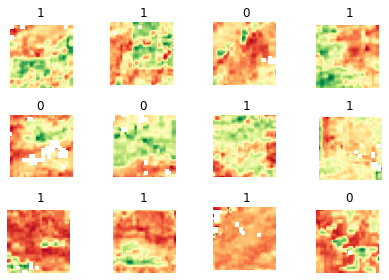

In [7]:
fig = plt.figure()

idx = np.random.randint(0,len(X), 12)

j = 1
for i in idx:
    plt.subplot(3,4,j)
    masked_array = np.ma.masked_where(X[i] == 0, X[i])
    plt.imshow(masked_array, cmap = cm.RdYlGn)
    plt.title(y[i])
    plt.axis('off')
    j+=1
    
fig.tight_layout()
plt.show()

In [33]:
# stack data
X = np.stack(X)
y = np.array(y)

In [34]:
# Flatten imamges
n_samples = X.shape[0]
X_data = X.reshape((n_samples, -1))

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_data,y, test_size = 0.2, random_state = 101)
print('Training data size: \n{}'.format(X_train.shape[0]))
print('Test data size: \n{}'.format(X_test.shape[0]))

Training data size: 
2822
Test data size: 
706


KNN Classification

The optimal number of neighbors is 7


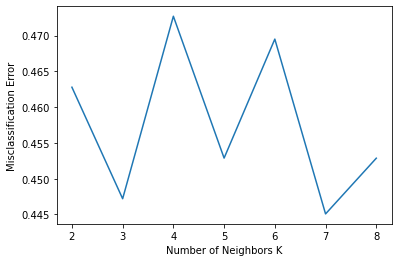

The Accuracy is 0.5679886685552408 



In [35]:
# Cross Validation to check best k
X_train, X_test, y_train, y_test = train_test_split(X_data,y, test_size = 0.2, random_state = 101)

neighbors = list(range(2,9,1))
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

# Plot misclassification error
mse = [1 - x for x in cv_scores]

# determine the best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(str(optimal_k)))

# plot misclassification error vs k
plt.figure()
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

# Using the optimal_k predict the test test
KNN_model = KNeighborsClassifier(n_neighbors = optimal_k)
KNN_model.fit(X_train, y_train)

# Predict on the test set
KNN_result = metrics.accuracy_score(KNN_model.predict(X_test), y_test)
print("The Accuracy is {} \n".format(str(KNN_result)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[149 166]
 [139 252]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix
[[0.47 0.53]
 [0.36 0.64]]


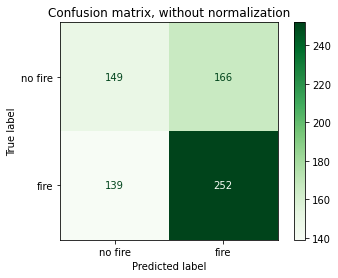

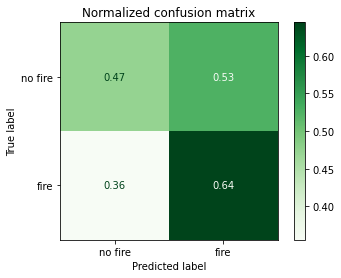

In [36]:
np.set_printoptions(precision=2)

class_names = ['no fire', 'fire']

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = metrics.plot_confusion_matrix(KNN_model, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

SVM Classification

In [37]:
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [39]:
# Find best parameters
svm_param = svc_param_selection(X_train, y_train, 10)

# Fit model
svm_model = svm.SVC(kernel='rbf', gamma = svm_param['gamma'], C = svm_param['C'])
svm_model.fit(X_train, y_train)

print('Model test accuracy is', svm_model.score(X_test, y_test))

Model test accuracy is 0.6883852691218131


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[315   0]
 [220 171]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix
[[1.   0.  ]
 [0.56 0.44]]


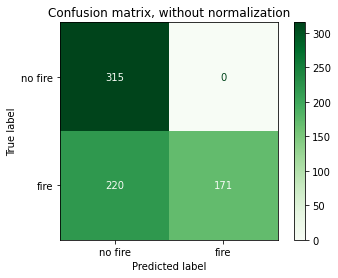

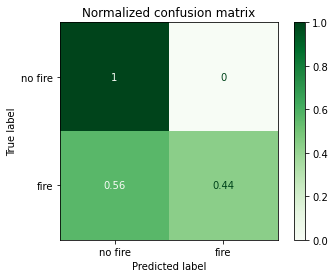

In [40]:
np.set_printoptions(precision=2)

class_names = ['no fire', 'fire']

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = metrics.plot_confusion_matrix(svm_model, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [41]:
svm_param

{'C': 1, 'gamma': 0.001}

In [49]:
# Predict labels for test data
svm_pred = svm_model.predict(X_test)

# Accuracy and Classification Reeport
print(f"Accuracy: {metrics.accuracy_score(y_test, svm_pred)}")
print(metrics.classification_report(y_test, svm_pred))

Accuracy: 0.6883852691218131
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       315
           1       1.00      0.44      0.61       391

    accuracy                           0.69       706
   macro avg       0.79      0.72      0.67       706
weighted avg       0.82      0.69      0.67       706



Random Forest Classification

In [43]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()

In [44]:
n_estimators = [100,300,500,800,1200]
max_depth = [5,8,15,25,30]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

hyperF = dict(n_estimators = n_estimators,
             max_depth = max_depth,
             min_samples_split= min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(random_forest, hyperF, cv = 3, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


In [45]:
bestF.best_params_

{'max_depth': 25,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [46]:
# Predict labels for test data
rf_pred = bestF.predict(X_test)

# Accuracy and Classification Report
print(f"Accuracy: {metrics.accuracy_score(y_test, rf_pred)}")
print(metrics.classification_report(y_test, rf_pred))

Accuracy: 0.7606232294617564
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       315
           1       0.76      0.82      0.79       391

    accuracy                           0.76       706
   macro avg       0.76      0.75      0.75       706
weighted avg       0.76      0.76      0.76       706



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[215 100]
 [ 69 322]]
Normalized confusion matrix
[[0.68 0.32]
 [0.18 0.82]]


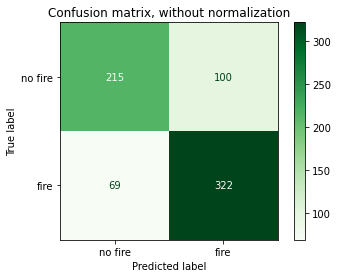

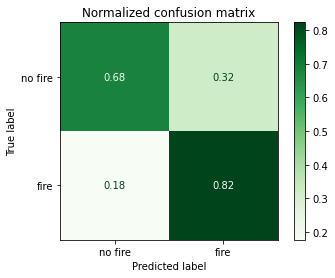

In [47]:
np.set_printoptions(precision=2)

class_names = ['no fire', 'fire']

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = metrics.plot_confusion_matrix(bestF, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

3 Months Data

In [50]:
root = "/content/drive/MyDrive/ml_wildfire/input_3datapng"

In [51]:
fire = glob(os.path.join(root, "3m_firepng", '*.png'))
X = []
y = []
for i in fire:
    with rio.open(i, 'r') as f:
        X.append(f.read())
    y.append(1)

In [52]:
nofire = glob(os.path.join(root, "3m_nofirepng", '*.png'))
for i in nofire:
    with rio.open(i, 'r') as f:
        X.append(f.read())
    y.append(0)

In [53]:
# stack data
X = np.stack(X)
y = np.array(y)

In [54]:
# Flatten imamges
n_samples = X.shape[0]
X_data = X.reshape((n_samples, -1))

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_data,y, test_size = 0.2, random_state = 101)
print('Training data size: \n{}'.format(X_train.shape[0]))
print('Test data size: \n{}'.format(X_test.shape[0]))

Training data size: 
2822
Test data size: 
706


KNN Classification

The optimal number of neighbors is 5


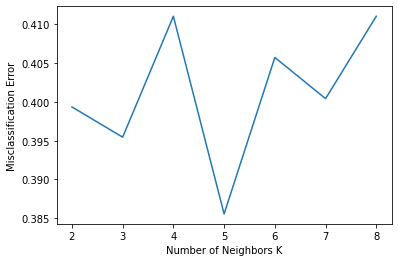

The Accuracy is 0.5807365439093485 



In [13]:
# Cross Validation to check best k
X_train, X_test, y_train, y_test = train_test_split(X_data,y, test_size = 0.2, random_state = 101)

neighbors = list(range(2,9,1))
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_train, y_train, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

# Plot misclassification error
mse = [1 - x for x in cv_scores]

# determine the best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(str(optimal_k)))

# plot misclassification error vs k
plt.figure()
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

# Using the optimal_k predict the test test
KNN_model = KNeighborsClassifier(n_neighbors = optimal_k)
KNN_model.fit(X_train, y_train)

# Predict on the test set
KNN_result = metrics.accuracy_score(KNN_model.predict(X_test), y_test)
print("The Accuracy is {} \n".format(str(KNN_result)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[145 170]
 [126 265]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix
[[0.46 0.54]
 [0.32 0.68]]


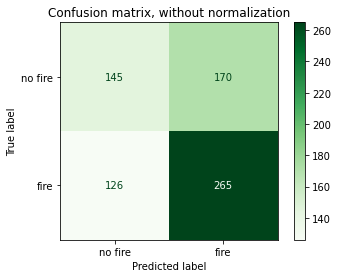

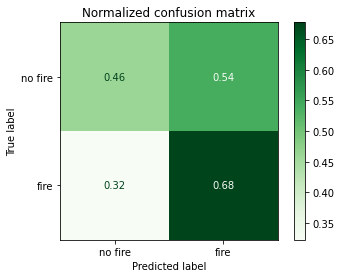

In [29]:
np.set_printoptions(precision=2)

class_names = ['no fire', 'fire']

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = metrics.plot_confusion_matrix(KNN_model, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

SVM Classification

In [15]:
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [16]:
# Find best parameters
svm_param = svc_param_selection(X_train, y_train, 10)

# Fit model
svm_model = svm.SVC(kernel='rbf', gamma = svm_param['gamma'], C = svm_param['C'])
svm_model.fit(X_train, y_train)

print('Model test accuracy is', svm_model.score(X_test, y_test))

Model test accuracy is 0.6883852691218131


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[315   0]
 [220 171]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix
[[1.   0.  ]
 [0.56 0.44]]


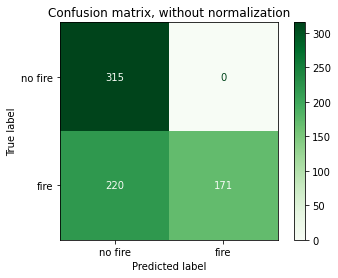

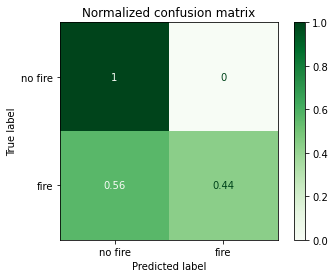

In [25]:
np.set_printoptions(precision=2)

class_names = ['no fire', 'fire']

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = metrics.plot_confusion_matrix(svm_model, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [26]:
svm_param

{'C': 1, 'gamma': 0.001}

In [27]:
# Predict labels for test data
svm_pred = svm_model.predict(X_test)

# Accuracy and Classification Reeport
print(f"Accuracy: {metrics.accuracy_score(y_test, svm_pred)}")
print(metrics.classification_report(y_test, svm_pred))

Accuracy: 0.6883852691218131
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       315
           1       1.00      0.44      0.61       391

    accuracy                           0.69       706
   macro avg       0.79      0.72      0.67       706
weighted avg       0.82      0.69      0.67       706



Random Forest Classification

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
random_forest = RandomForestClassifier(n_estimators = 300, max_depth = 25, min_samples_split = 2, min_samples_leaf = 2)
random_forest.fit(X_train, y_train)

# Predict labels for test data
rf_pred = random_forest.predict(X_test)

# Accuracy and Classification Reeport
print(f"Accuracy: {metrics.accuracy_score(y_test, rf_pred)}")
print(metrics.classification_report(y_test, rf_pred))

Accuracy: 0.7507082152974505
              precision    recall  f1-score   support

           0       0.76      0.64      0.70       315
           1       0.74      0.84      0.79       391

    accuracy                           0.75       706
   macro avg       0.75      0.74      0.74       706
weighted avg       0.75      0.75      0.75       706



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[203 112]
 [ 64 327]]
Normalized confusion matrix
[[0.64 0.36]
 [0.16 0.84]]


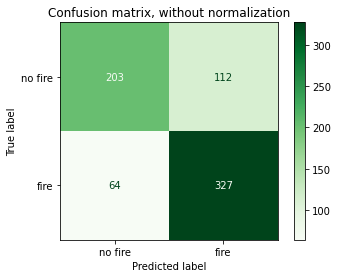

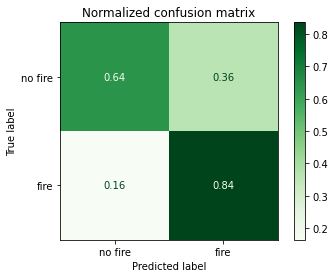

In [57]:
np.set_printoptions(precision=2)

class_names = ['no fire', 'fire']

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = metrics.plot_confusion_matrix(random_forest, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#session is timing out on colab while trying to find optimal parameters for random forest for 3 month data
n_estimators = [100,300,500,800,1200]
max_depth = [5,8,15,25,30]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

hyperF = dict(n_estimators = n_estimators,
             max_depth = max_depth,
             min_samples_split= min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(random_forest, hyperF, cv = 3, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
